## **Python (plus Stanford Core NLP) Stopword List Analysis**

In Python, there are just four main ones:
- gensim
- nltk
- sklearn
- spacy

In R, there are many more available:
- *lexicon*
    - Leveled Dolch list of 220 words
    - Fry's most commonly used words (25 to 1000)
    - Matthew-Jocker's expanded topic modelling list
    - Loughran-McDonald short and long
    - Lucerne
    - MALLET
    - Python
- *stopwords*
    - marimo
    - nltk
    - stopwords-iso
- *tidytext*
    - onix
- *tm / quanteda tidytext / stopwords*
    - smart
    - snowball

In [1]:
# import libraries and stopword lists
import en_core_web_sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
# gensim stopwords
gensim_sw = set(STOPWORDS)
gensim_sw_series = pd.Series(list(gensim_sw)).sort_values()

# nltk stopwords
nltk_sw = set(stopwords.words('english'))
nltk_sw_series = pd.Series(list(nltk_sw)).sort_values()

# sklearn #
sklearn_sw = set(ENGLISH_STOP_WORDS)
sklearn_sw_series = pd.Series(list(sklearn_sw)).sort_values()

# spacy stopwords
nlp = en_core_web_sm.load()
spacy_sw = nlp.Defaults.stop_words
spacy_sw_series = pd.Series(list(spacy_sw)).sort_values()

# Stanford Core NLP stopword list
with open('coreNLP_stopwords.txt', 'r') as f:
    lines = f.read().splitlines()
coreNLP_sw_series = pd.Series(lines).sort_values()

In [3]:
# concatenate all the lists together and determine the total number of unique stopwords
frames = [coreNLP_sw_series, gensim_sw_series, nltk_sw_series, sklearn_sw_series, spacy_sw_series]
all_stopwords = pd.concat(frames)

all_unique_stopwords = set(all_stopwords)
print("Across the five lists, there are " + str(len(all_unique_stopwords)) + " unique stopwords")

Across the five lists, there are 516 unique stopwords


In [4]:
# count the number of times each stopword appears
sw_freq = Counter(all_stopwords)
freq_df = pd.DataFrame.from_dict(sw_freq, orient='index', columns=['count']).sort_values(by=['count'], ascending=False)
freq_df

,count
its,6
were,6
very,5
is,5
itself,5
...,...
they're,1
they've,1
theyll,1
theyre,1


In [5]:
# data sitting behind the first figure
sw_lists = {'list': ['coreNLP', 'gensim', 'nltk', 'sklearn', 'spacy'],
            'num_items': [coreNLP_sw_series.shape[0], len(gensim_sw), len(nltk_sw), len(sklearn_sw), len(spacy_sw)]}

sw_list_lengths = pd.DataFrame(sw_lists)
sw_list_lengths

,list,num_items
0,coreNLP,257
1,gensim,337
2,nltk,179
3,sklearn,318
4,spacy,326


In [6]:
# data sitting behind the second figure
grouped_freq_df = pd.DataFrame(freq_df.groupby(['count']).size().reset_index())
grouped_freq_df.columns = ['num_lists', 'count']
grouped_freq_df

,num_lists,count
0,1,155
1,2,63
2,3,173
3,4,10
4,5,113
5,6,2


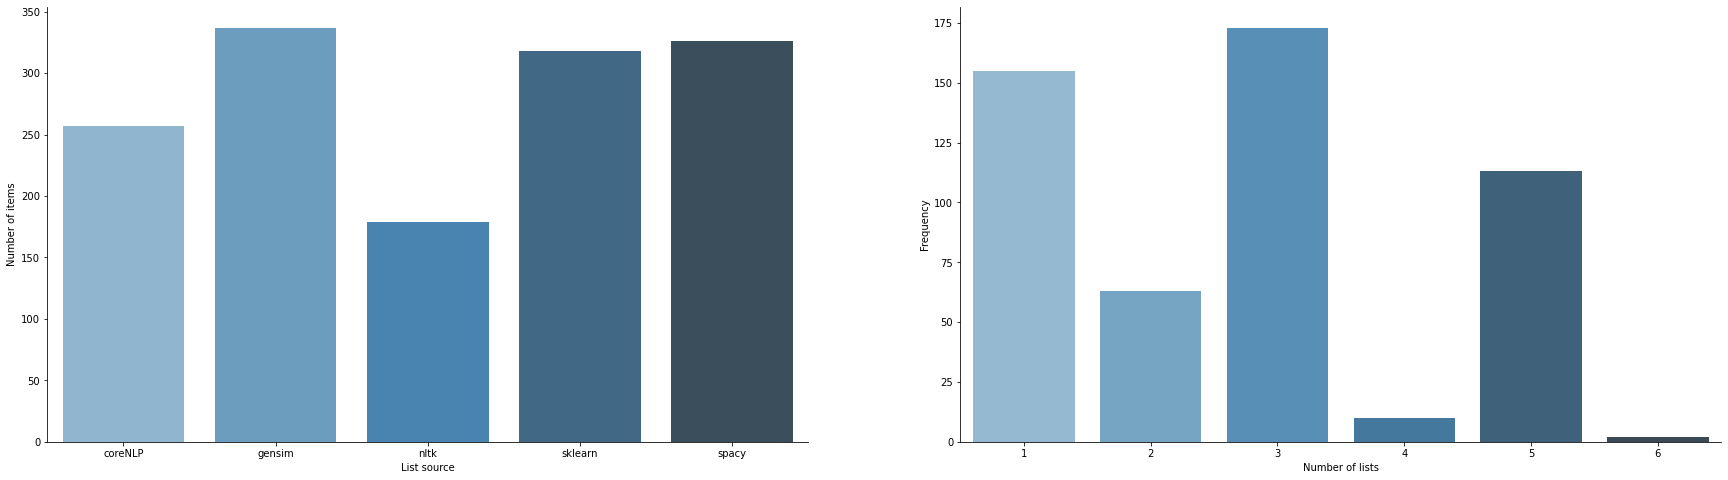

In [7]:
# ensures figures are plotted automatically; the alternative is to add the command plt.show() at the end of every figure
%matplotlib inline

# barchart of the total number of words in each stopword list
fig, axs = plt.subplots(1,2, figsize=(30,8))
p = sns.barplot(ax=axs[0], x=sw_lists['list'], y=sw_lists['num_items'], palette='Blues_d')
p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
p.set_xlabel("List source")
p.set_ylabel("Number of items")
p2 = sns.countplot(ax=axs[1], data = freq_df, x='count', palette='Blues_d')
p2.spines['right'].set_visible(False)
p2.spines['top'].set_visible(False)
p2.set_xlabel("Number of lists")
p2.set_ylabel("Frequency");